In [2]:
import stata_setup
stata_setup.config("C:/Program Files/Stata18", "mp")



  ___  ____  ____  ____  ____ ®
 /__    /   ____/   /   ____/      18.0
___/   /   /___/   /   /___/       MP—Parallel Edition

 Statistics and Data Science       Copyright 1985-2023 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-STATA-PC        https://www.stata.com
                                   979-696-4600        stata@stata.com

Stata license: Single-user 2-core , expiring 30 Jul 2025
Serial number: 501809391765
  Licensed to: JUAN MANUEL RIVAS CASTILLO
               OSINERGMIN

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. More than 2 billion observations are allowed; see help obs_advice.
      3. Maximum number of variables is set to 5,000 but can be increased;
          see help set_maxvar.


In [11]:
%%stata
clear 
notes :"Configuramos la carpeta de trabajo"
cd "F:\OSINERGMIN\IM-08\Data"

local files: dir . file "*.xlsx"
*Files = [files for files in os.listdir() if files.endswith('.xlsx')]


. clear 

. notes :"Configuramos la carpeta de trabajo"

. cd "F:\OSINERGMIN\IM-08\Data"
F:\OSINERGMIN\IM-08\Data

. 
. local files: dir . file "*.xlsx"

. *Files = [files for files in os.listdir() if files.endswith('.xlsx')]
. 


In [12]:
%%stata
notes: Cargar y fusionar los excel 
quiet{
tempfile data
save `data', emptyok
forvalues i = 2015/2024 {
tempfile d`i'
import excel using `i.xlsx', describe
local sheets = r(N_worksheet)


forvalues j = 1/`sheets' {
dis "`r(worksheet_`j')'"
import excel using `i.xlsx', clear sheet(`r(worksheet_`j')') first 
g Año = `i' 
g Mes = `j'
destring N, replace force
save `d'`i'`j', replace
scalar sum`d'`i'`j' = r(N)
use `data', clear 
append using `d'`i'`j'
save `"`data'"', replace
* Se debe volver a incluir el describe para que funcione
import excel using `i.xlsx', describe        
}
}
}


. notes: Cargar y fusionar los excel 

. quiet{

. 


In [14]:
%%stata
notes: 'Filtro=Eliminar columnas vacías'


foreach var of varlist _all {
capture assert mi(`var')
if !_rc {
drop `var'
}
}


. notes: 'Filtro=Eliminar columnas vacías'

. 
. 
. foreach var of varlist _all {
  2. capture assert mi(`var')
  3. if !_rc {
  4. drop `var'
  5. }
  6. }

. 


In [15]:
%%stata
notes: '2. Eliminamos filas vacías'
dropmiss, obs force 


. notes: '2. Eliminamos filas vacías'

. dropmiss, obs force 
(0 observations deleted)

. 


In [16]:
%%stata
notes: '3. Nos quedamos con las variables de interés'
keep Dpto D Provincia Distrito Localidad Deno Actividad Tipodeactividad Estado Fase Año Mes Regiónprincipal Dpto* E C


. notes: '3. Nos quedamos con las variables de interés'

. keep Dpto D Provincia Distrito Localidad Deno Actividad Tipodeactividad Estad
> o Fase Año Mes Regiónprincipal Dpto* E C

. 


In [17]:
%%stata
notes: '4. Nos quedamos solamente con actividades mineras'
keep if Actividad=="Minería"


. notes: '4. Nos quedamos solamente con actividades mineras'

. keep if Actividad=="Minería"
(36,569 observations deleted)

. 


In [18]:
%%stata
notes:  '5. Miremos los Dptos'
replace Dpto = Región if Dpto==""
replace Dpto = Dpto1 if Dpto==""
replace Dpto = "Multiregión" if Dpto=="Multirregional"

replace D = E if D==""  & Dpto == "Multiregión"
replace D = C if D=="" & Dpto == "Multiregión"
replace D = Dpto1 if D=="" & Dpto == "Multiregión"


. notes:  '5. Miremos los Dptos'

. replace Dpto = Región if Dpto==""
(2,281 real changes made)

. replace Dpto = Dpto1 if Dpto==""
(5,103 real changes made)

. replace Dpto = "Multiregión" if Dpto=="Multirregional"
(9 real changes made)

. 
. replace D = E if D==""  & Dpto == "Multiregión"
(9 real changes made)

. replace D = C if D=="" & Dpto == "Multiregión"
(12 real changes made)

. replace D = Dpto1 if D=="" & Dpto == "Multiregión"
(9 real changes made)

. 


In [19]:
%%stata
notes: 'Filtros por Provincias'

replace Provincia = "Lucanas" if Provincia=="Lucana"
replace Provincia = "Nazca" if Provincia=="Nasca"
replace Provincia ="Lucanas / Parinacochas / Paucar del Sara Sara" if Provincia =="Licanas / Parinacochas / Paucar del Sara Sara"
replace Provincia ="Cajamarca / Celendin" if Provincia =="Celendín / Cajamarca"
replace Provincia ="Ilo / Mariscal Nieto" if Provincia =="Mariscal Nieto / Ilo"
replace Provincia ="Huari / Recuay" if Provincia =="Recuay / Huari"



. notes: 'Filtros por Provincias'

. 
. replace Provincia = "Lucanas" if Provincia=="Lucana"
(4 real changes made)

. replace Provincia = "Nazca" if Provincia=="Nasca"
(29 real changes made)

. replace Provincia ="Lucanas / Parinacochas / Paucar del Sara Sara" if Provinc
> ia =="Licanas / Parinacochas / Paucar del Sara Sara"
(1 real change made)

. replace Provincia ="Cajamarca / Celendin" if Provincia =="Celendín / Cajamarc
> a"
(58 real changes made)

. replace Provincia ="Ilo / Mariscal Nieto" if Provincia =="Mariscal Nieto / Il
> o"
(9 real changes made)

. replace Provincia ="Huari / Recuay" if Provincia =="Recuay / Huari"
(9 real changes made)

. 


In [10]:
%%stata
notes: 'Filtros por Distrito'
replace Distrito = strtrim(Distrito)
replace Distrito = "Huantán" if Distrito=="Huantan"
replace Distrito = "Ticlacayán" if Distrito=="Ticlacayan"
replace Distrito = "Velille" if Distrito=="Velile"
replace Distrito = "Cenepa" if Distrito=="El Cenepa"
replace Distrito = "Pocohuanca / Tapayrihua" if Distrito=="Tapairihua"

replace Distrito = "Morococha" if Distrito=="Moro"

replace Distrito = "San Mateo" if Distrito=="San Mateo de Huanchor"


. * Distrito
. replace Distrito = strtrim(Distrito)
(8 real changes made)

. replace Distrito = "Huantán" if Distrito=="Huantan"
(3 real changes made)

. replace Distrito = "Ticlacayán" if Distrito=="Ticlacayan"
(4 real changes made)

. replace Distrito = "Velille" if Distrito=="Velile"
(9 real changes made)

. replace Distrito = "Cenepa" if Distrito=="El Cenepa"
(109 real changes made)

. replace Distrito = "Pocohuanca / Tapayrihua" if Distrito=="Tapairihua"
(2 real changes made)

. 
. replace Distrito = "Morococha" if Distrito=="Moro"
(1 real change made)

. 
. replace Distrito = "San Mateo" if Distrito=="San Mateo de Huanchor"
(9 real changes made)

. 


In [11]:
%%stata
* 6. Denominación del Caso

* Se requiere hacer limpieza de la variable

foreach i of numlist 6 8 14 10 13 {
replace Denominación = subinstr(Denominación, "`i'", "",.)
}

replace Denominación = subinstr(Denominación, "C.C.", "CC",.)
replace Denominación = subinstr(Denominación, "Americas", "American",.)
replace Denominación = subinstr(Denominación, " - ", "-",.)
replace Denominación = subinstr(Denominación, "GlencoreXtrata", "GlencoreXstrata",.)
replace Denominación = subinstr(Denominación, "ANTAMINA", "Antamina",.)
replace Denominación = subinstr(Denominación, "Santa Cruz-Axell II", "Santa Cruz-Axel II",.)
replace Denominación = subinstr(Denominación, "Tiaparo-Tapayrihua-SPCC (Los Chancas)", "Tiaparo / Tapayrihua-SPCC (Los Chancas)",.)

replace Denominación = strtrim(Denominación)

replace Denominación = "Cenepa-Afrodita" if Denominación =="Cenepa-Minería informal e ilegal" | Denominación == "Cenepa-Minería informal e ilegal (antes Afrodita)"

replace Denominación ="Quillo-COPEMINA" if Denominación=="CC Quillo-COPEMINA"

replace Denominación ="Pampas-Tungsteno Málaga" if Denominación=="Pampas-Tungsteno Málaga del Perú"

replace Denominación ="Tiaparo / Tapayrihua-SPCC (Los Chancas)" if Denominación=="Tiaparó-SPCC" | Denominación=="Tiaparo / Tapayrihua-SPCC" | Denominación=="Tapayrihua-SPCC"

replace Denominación ="Challhuahuacho-Xstrata" if Denominación=="Challhuahuacho-Xstrata (Las Bambas)"

replace Denominación ="CC Choaquere-Minera Las Bambas" if Denominación=="Choaquere-Minera Las Bambas"

replace Denominación ="Cotabambas-MMG (Las Bambas)" if Denominación=="Cotabambas-MMG Las Bambas (Antes Xstrata)" | Denominación=="Cotabambas-Minera Las Bambas (Antes Xstrata)"

replace Denominación ="CC Fuerabamba-Minera Las Bambas" if Denominación=="Fuerabamba (Yavi Yavi)-Minera Las Bambas"

replace Denominación ="CC Huancuire-Minera Las Bambas" if Denominación=="Huancuire-Minera Las Bambas"

replace Denominación ="Haquira-Anabi" if Denominación=="Haquira-Anabi (Utunsa)" | Denominación=="Haquira-Anabi (Utunsa)"


replace Denominación ="CC Pumamarca-Minera Las Bambas" if Denominación=="Pumamarca-Minera Las Bambas"

replace Denominación ="CC Pumamarca-Minera Las Bambas" if Denominación=="Pumamarca-Minera Las Bambas"

replace Denominación ="Planta concentradora Usayma" if Denominación=="Planta concentradora Usayma-minería informal"

replace Denominación ="Chala-Minería informal" if Denominación=="Mineros Informales-Chala" | Denominación=="Minería Informal" | Denominación=="Minería Informal-Chala"


replace Denominación ="Tía María-Islay" if Denominación=="Proyecto minero Tía María"

replace Denominación ="Puquio- Exploraciones Mineras" if Denominación=="Puquio- Exploraciones Andinas"


replace Denominación ="Cía Minera Ares" if Denominación=="Pallancata – Cía Minera Ares" | Denominación=="Centro poblado Huancute-Cía minera Ares"| Denominación=="CC Huallhua-Cía minera Ares" | Denominación=="Casma Palla-Ares"

replace Denominación ="Tintay-Laconia South América" if Denominación=="Tintay-Laconia South América (Apu Ccarhuarazo)" 

replace Denominación ="La Chilca/ Algamarca – Minería Informal" if Denominación=="La Chilca-Algamarca – Minería Informal & Sullidén S.A.C. (Py. Shahuindo)" 

replace Denominación ="La Shacsha-Yanacocha" if Denominación=="La Shacsha-Minera Yanacocha" 


replace Denominación ="Proyecto minero Conga" if Denominación=="Conga-Yanacocha" 

replace Denominación ="El Tingo –  Minera Coimolache" if Denominación=="CC El Tingo –  Minera Coimolache" | Denominación=="El Tingo – Coimolache"

replace Denominación ="El Tingo-Goldfields" if Denominación=="El Tingo-Gold Fields La Cima" | Denominación=="Hualgayoc – Gold Field La Cima"

replace Denominación ="Hualgayoc-Contaminación por plomo" if Denominación=="Plomo en la sangre"

replace Denominación ="Chumbivilcas-Minera Las Bambas" if Denominación=="Chumbivilcas-Minera Las Bambas (II)"

replace Denominación ="CC Fuerabamba-Minera Las Bambas" if Denominación=="CC Fuerabamba (Yavi Yavi)-MMG Las Bambas" | Denominación=="Fuerabamba (Yavi Yavi)-MMG Las Bambas"

replace Denominación ="CC Ccollana-Hudbay" if Denominación=="Ccollana-Hudbay"

replace Denominación ="Velille-Las Bambas" if Denominación=="Velille-MMG Las Bambas"

replace Denominación ="Espinar-Antapaccay" if Denominación=="Espinar-Antapaccay (ex Glencore Xstrata)"

replace Denominación ="Paruro-MMG Las Bambas" if Denominación=="Paruro-Minera Las Bambas"

replace Denominación ="Pampalca-Doe Run" if Denominación=="San Pedro de Coris-Doe Run" | Denominación=="Coris-DoeRun"

replace Denominación ="Huachocolpa-Minera Kolpa" if Denominación=="Huachocolpa – Cía minera Kolpa"

replace Denominación ="Llata-Antamina" if Denominación=="Llata-Antamina (II)"

replace Denominación ="CC Chavín-Minera Nexa Resources" if Denominación=="CC Chavín-Nexa" | Denominación=="Chavín-Nexa Resources"

replace Denominación ="Alpamarca-Consorcio Minero  Horizonte" if Denominación=="Alpamarca-Horizonte" 

replace Denominación ="Yuracyacu-Consorcio Minero Horizonte" if Denominación=="Yuracyacu-Minera Horizonte" 

replace Denominación ="Caserio Shiracmaca-Summa Gold" if Denominación=="Caserio Shiracmaca y empresa minera Summa Gold" 

replace Denominación ="Contaminación-río Chillón" if Denominación=="Frente de Defensa de Canta-Río Chillón" 

replace Denominación ="CC Paran-Invicta" if Denominación=="Parán-Invicta" 

replace Denominación ="CC Oyón-Minera Raura" if Denominación=="Oyón-Minera Raura" 

replace Denominación ="Quichas-Minera Raura" if Denominación=="Quichas-Raura S.A." 

replace Denominación ="CC Santa Cruz-Axel II" if Denominación=="Santa Cruz-Axel II" 

replace Denominación ="Torata-ANA" if Denominación=="Torata-ANA-Southern Perú" 

replace Denominación ="Cerro SAC-San Antonio de Rancas" if Denominación=="Cerro S.A.C.-San Antonio de Rancas" 

replace Denominación ="Comité de Evaluación DEA-Simón Bolívar" if Denominación=="Contaminación en Simón Bolívar" 

replace Denominación ="CC San Pablo de Ticlacayán-Nexa" if Denominación=="San Pablo de Ticlacayán-Nexa" 

replace Denominación ="CC Smelter-Brocal" if Denominación=="Smelter-Brocal" 

replace Denominación ="Río Blanco (ex Majaz)" if Denominación=="Py. Rio Blanco (ex Majaz)" 

replace Denominación ="San Martín de Sechura-Miski Mayo" if Denominación=="San Martín de Sechura-Miski Mayo S.R.L." 

replace Denominación ="Cuenca Suches-Minería informal e ilegal (II)" if Denominación=="Suches-Minería Informal" 

replace Denominación ="Ocuviri-ARASI" if Denominación=="Ocuviri-Arasi" | Denominación=="Ocuviri-Aruntani" | | Denominación=="Ocuviri-Aruntani (Arasi)"

replace Denominación ="Cuenca Llallimayo-Aruntani" if Denominación=="Cuenca Llallimayo-Aruntani (Arasi)"

replace Denominación ="Ramis-Minería informal" if Denominación=="Minería informal-Río Ramis"

replace Denominación ="Wampis-Minería ilegal" if Denominación=="Wampis-mineros ilegales"


replace Denominación ="Curahuasi-Canteras" if Denominación=="Curahuasi / Ccochua-extracción arena" | Denominación=="Curahuasi-Ccochua"

replace Denominación ="La Chilca/ Algamarca – Minería Informal" if Denominación=="La Chilca-Algamarca – Minería Informal  & Sullidén S.A.C. (Py. Shahuindo)"

replace Denominación ="La Shacsha-Yanacocha" if Denominación=="Baños del Inca (La Shacsha)-Yanacocha"

replace Denominación ="Chumbivilcas-Minera Las Bambas" if Denominación=="Chumbivilcas-MMG Las Bambas"

replace Denominación ="Río Blanco (ex Majaz)" if Denominación=="RÍo Blanco (ex Majaz)"

replace Denominación ="CC Fuerabamba-Minera Las Bambas" if Denominación=="CC Fuerabamba-MMG Las Bambas"

replace Denominación ="CC. Aruntaya-Aruntani" if Denominación=="CC. Ayuntaya-Aruntani"

replace Denominación ="Chaupimarca-Cerro SAC" if Denominación=="Chaupimarca-Cerro S.A.C."

replace Denominación ="Chaviña-Apumayo SAC" if Denominación=="Chaviña-Apumayo S.A.C."


replace Denominación ="Disputa entre grupos mineros ilegales" if Denominación=="Disputa entre grupos mineros ilegales.."

replace Denominación ="El Tingo – Minera Coimolache" if Denominación=="El Tingo –  Minera Coimolache"

replace Denominación ="Huanacopampa-Firts Quantum" if Denominación=="Huanacopampa-Fisrts Quantum"

replace Denominación ="Paratia-CIEMSA" if Denominación=="Paratía-CIEMSA"


. * 6. Denominación del Caso
. 
. * Se requiere hacer limpieza de la variable
. 
. foreach i of numlist 6 8 14 10 13 {
  2. replace Denominación = subinstr(Denominación, "`i'", "",.)
  3. }
(1 real change made)
(1 real change made)
(29 real changes made)
(58 real changes made)
(55 real changes made)

. 
. replace Denominación = subinstr(Denominación, "C.C.", "CC",.)
(185 real changes made)

. replace Denominación = subinstr(Denominación, "Americas", "American",.)
(105 real changes made)

. replace Denominación = subinstr(Denominación, " - ", "-",.)
(7,267 real changes made)

. replace Denominación = subinstr(Denominación, "GlencoreXtrata", "GlencoreXstr
> ata",.)
(2 real changes made)

. replace Denominación = subinstr(Denominación, "ANTAMINA", "Antamina",.)
(28 real changes made)

. replace Denominación = subinstr(Denominación, "Santa Cruz-Axell II", "Santa C
> ruz-Axel II",.)
(52 real changes made)

. replace Denominación = subinstr(Denominación, "Tiaparo-Tapayrihua-SPCC (Los C
> ha

In [12]:
%%stata
keep if Estado=="Activo"
replace Fases = "Fase Temprana" if Fases=="Fase temprana"
tab Deno if Año==2015

g MI = 1 if (strpos(Deno, "Minería informal") | strpos(Deno, "Mineros informales") | strpos(Deno, "Minería Informal")) & Año==2015

tab Deno if Año==2015


. keep if Estado=="Activo"
(2,471 observations deleted)

. replace Fases = "Fase Temprana" if Fases=="Fase temprana"
(344 real changes made)

. tab Deno if Año==2015

                  Denominación del caso |      Freq.     Percent        Cum.
----------------------------------------+-----------------------------------
                 AMUCEPS-Huari CC Catac |         12        1.38        1.38
                American Potash-Sechura |         12        1.38        2.76
              Ampliación Toquepala SPCC |         12        1.38        4.13
             Antapaccay-GlencoreXstrata |         12        1.38        5.51
                          Atupa-Barrick |         12        1.38        6.89
                       Ayaccasi-ASDECUA |          3        0.34        7.23
                         Ayash-Antamina |         12        1.38        8.61
                     Buenaventura-Tapay |          1        0.11        8.73
C.P. Chirinos-EMRL San Sebastián/Loma.. |         11        1.

In [13]:
%%stata
sort Año Mes
bys Dpto Provincia Distrito Denominación (Año Mes): g ID = _n

keep Dpto Provincia Distrito Denominación Año Mes ID Fases
compress
g Fecha = ym(Año, Mes)


. sort Año Mes

. bys Dpto Provincia Distrito Denominación (Año Mes): g ID = _n

. 
. keep Dpto Provincia Distrito Denominación Año Mes ID Fases

. compress
  variable Año was float now int
  variable Mes was float now byte
  variable ID was float now int
  variable Dpto was str54 now str15
  variable Provincia was str61 now str49
  variable Denominacióndelcaso was str103 now str78
  (611,793 bytes saved)

. g Fecha = ym(Año, Mes)

. 


In [14]:
%%stata
format Fecha %tm 
egen Fmin = min(Fecha),by(Dpto Denominación)
egen Fmax = max(Fecha),by(Dpto Denominación)


. format Fecha %tm 

. egen Fmin = min(Fecha),by(Dpto Denominación)

. egen Fmax = max(Fecha),by(Dpto Denominación)

. 


In [15]:
%%stata
duplicates drop Dpto Provincia Denominación Fmin Fmax, force 
cap drop Casos
bys Dpto Provincia: g Casos = _N
collapse (first) Fmin Fmax Casos, by(Dpto Provincia)
g tiempo = Fmax-Fmin + 1
replace Provincia = subinstr(Provincia, "/", ",",.)
split Provincia, p(,)
l


. duplicates drop Dpto Provincia Denominación Fmin Fmax, force 

Duplicates in terms of Dpto Provincia Denominacióndelcaso Fmin Fmax

(7,109 observations deleted)

. cap drop Casos

. bys Dpto Provincia: g Casos = _N

. collapse (first) Fmin Fmax Casos, by(Dpto Provincia)

. g tiempo = Fmax-Fmin + 1

. replace Provincia = subinstr(Provincia, "/", ",",.)
(17 real changes made)

. split Provincia, p(,)
variables created as string: 
Provincia1  Provincia2  Provincia3  Provincia4  Provincia5

. l

     +---------------------------------------------------------------------+
  1. |            Dpto |                                         Provincia |
     |        Amazonas |                                      Condorcanqui |
     |---------------------------------------------------------------------|
     |  Fmin  |  Fmax   |  Casos   |  tiempo   |              Provincia1   |
     |   667  |   772   |      2   |     106   |            Condorcanqui   |
     |------------------+-------------

In [16]:
%%stata
drop Provincia

cap drop year 
keep Dpto Casos tiempo P*
g ID = _n
reshape long Provincia, i( ID) 
keep if Provincia !=""
l


. drop Provincia

. 
. cap drop year 

. keep Dpto Casos tiempo P*

. g ID = _n

. reshape long Provincia, i( ID) 
(j = 1 2 3 4 5)

Data                               Wide   ->   Long
-----------------------------------------------------------------------------
Number of observations              110   ->   550         
Number of variables                   9   ->   6           
j variable (5 values)                     ->   _j
xij variables:
   Provincia1 Provincia2 ... Provincia5   ->   Provincia
-----------------------------------------------------------------------------

. keep if Provincia !=""
(413 observations deleted)

. l

     +----------------------------------------------------------------------+
     |  ID   _j              Dpto   Casos   tiempo                Provincia |
     |----------------------------------------------------------------------|
  1. |   1    1          Amazonas       2      106             Condorcanqui |
  2. |   2    1          Apurímac       2     

In [17]:
%%stata 
replace Dpto = trim(Dpto)
replace Provincia = trim(Provincia)

sort Provincia
replace Provincia = subinstr(Provincia,".","",.)
replace Provincia = subinstr(Provincia,"í","i",.)
replace Dpto = "Junín" if Dpto=="Multiregión" & Provincia=="Huancayo"
replace Dpto = "Junín" if Dpto=="Multiregión" & Provincia=="Junin"
replace Dpto = "Pasco" if Dpto=="Multiregión" & Provincia=="Pasco"
replace Provincia ="San Antonio de Putina" if Provincia=="San Antoni de Putina"
replace Provincia ="Victor Fajardo" if Provincia=="Victor Fajardo"
replace Provincia ="Jauja" if Provincia=="Yauyos" & Dpto=="Junín" 

replace Dpto = "Lima" if (Dpto=="Multiregión" |Dpto=="Lima Provincias" ) & Provincia=="Yauyos"

replace Dpto = "Lima" if Dpto=="Lima Provincias"

collapse (sum) Casos (max) tiempo ,by(Dpto Provincia)

replace Dpto = subinstr(Dpto,"í", "i",.)
replace Dpto = subinstr(Dpto,"á", "a",.)
replace Dpto = subinstr(Dpto,"Á", "A",.)

replace Provincia = subinstr(Provincia,"í", "i",.)
replace Provincia = subinstr(Provincia,"ó", "o",.)
replace Provincia = subinstr(Provincia,"á", "a",.)
save CS, replace


. replace Dpto = trim(Dpto)
(0 real changes made)

. replace Provincia = trim(Provincia)
(45 real changes made)

. 
. sort Provincia

. replace Provincia = subinstr(Provincia,".","",.)
(1 real change made)

. replace Provincia = subinstr(Provincia,"í","i",.)
(8 real changes made)

. replace Dpto = "Junín" if Dpto=="Multiregión" & Provincia=="Huancayo"
(1 real change made)

. replace Dpto = "Junín" if Dpto=="Multiregión" & Provincia=="Junin"
(2 real changes made)

. replace Dpto = "Pasco" if Dpto=="Multiregión" & Provincia=="Pasco"
(1 real change made)

. replace Provincia ="San Antonio de Putina" if Provincia=="San Antoni de Putin
> a"
(1 real change made)

. replace Provincia ="Victor Fajardo" if Provincia=="Victor Fajardo"
(0 real changes made)

. replace Provincia ="Jauja" if Provincia=="Yauyos" & Dpto=="Junín" 
(1 real change made)

. 
. replace Dpto = "Lima" if (Dpto=="Multiregión" |Dpto=="Lima Provincias" ) & Pr
> ovincia=="Yauyos"
(2 real changes made)

. 
. replace Dpto = "Lim

In [18]:
%%stata
local n1 ="DATOS3772980PRODUCCIONMINERAENE15MAY24.xlsx"

import excel using `n1', clear first 
local wovels = "Á É Í Ó Ú"
replace LEY = subinstr(LEY,"Á","A",.) 
replace LEY = subinstr(LEY,"É","E",.) 
replace LEY = subinstr(LEY,"é","e",.) 
replace LEY = subinstr(LEY,"Í","I",.) 
replace LEY = subinstr(LEY,"Ó","O",.) 
replace LEY = subinstr(LEY,"Ú","U",.) 
replace LEY = subinstr(LEY,"Ñ","ñ",.) 
g Tipo = lower(LEY)

replace PROVINCIA = subinstr(PROVINCIA,"Ñ","ñ",.) 
replace PROVINCIA = proper(PROVINCIA)
replace PROVINCIA = subinstr(PROVINCIA, "CañEte", "Cañete",.)
tab PROVINCIA 
replace REGIÓN = proper(REGIÓN)
tab REGIÓN

collapse (sum) PRODUC, by(REGIÓN PROVINCIA  Tipo)
drop if PROVINCIA=="-"
replace Tipo = "oxido" if Tipo=="oxido wolframio"
reshape wide PRODU, i(REGIÓN PROVINCIA) j(Tipo) string

ds PROD* 
foreach v in `r(varlist)' {
local v2 = substr("`v'", 12,10)
	display "`v2'"
rename `v' `v2'
}
ds ars-zinc
foreach v in `r(varlist)' {
replace `v'= 0 if `v'==.
}
rename REGIÓN Dpto
rename PROVINCIA Provincia 
replace Provincia ="Paucar del Sara Sara" if Provincia =="Paucar Del Sara Sara"
replace Provincia ="Nazca" if Provincia =="Nasca"
replace Provincia ="Santiago de Chuco" if Provincia =="Santiago De Chuco"
replace Dpto ="Madre de Dios" if Dpto =="Madre De Dios"

save Q, replace 
use Q, clear 
count 


. local n1 ="DATOS3772980PRODUCCIONMINERAENE15MAY24.xlsx"

. 
. import excel using `n1', clear first 
(11 vars, 60,318 obs)

. local wovels = "Á É Í Ó Ú"

. replace LEY = subinstr(LEY,"Á","A",.) 
(0 real changes made)

. replace LEY = subinstr(LEY,"É","E",.) 
(402 real changes made)

. replace LEY = subinstr(LEY,"é","e",.) 
(123 real changes made)

. replace LEY = subinstr(LEY,"Í","I",.) 
(0 real changes made)

. replace LEY = subinstr(LEY,"Ó","O",.) 
(36 real changes made)

. replace LEY = subinstr(LEY,"Ú","U",.) 
(0 real changes made)

. replace LEY = subinstr(LEY,"Ñ","ñ",.) 
(190 real changes made)

. g Tipo = lower(LEY)

. 
. replace PROVINCIA = subinstr(PROVINCIA,"Ñ","ñ",.) 
(295 real changes made)

. replace PROVINCIA = proper(PROVINCIA)
(49,273 real changes made)

. replace PROVINCIA = subinstr(PROVINCIA, "CañEte", "Cañete",.)
(340 real changes made)

. tab PROVINCIA 

                PROVINCIA |      Freq.     Percent        Cum.
--------------------------+--------------------

In [19]:
%%stata
use CS, clear 
count
merge 1:1 Dpto Provincia using Q
drop _merge
save b1, replace 


. use CS, clear 

. count
  94

. merge 1:1 Dpto Provincia using Q
(variable Provincia was str23, now str25 to accommodate using data's values)

    Result                      Number of obs
    -----------------------------------------
    Not matched                            53
        from master                        30  (_merge==1)
        from using                         23  (_merge==2)

    Matched                                64  (_merge==3)
    -----------------------------------------

. drop _merge

. save b1, replace 
file b1.dta saved

. 


In [20]:
%%stata
%ssc install shp2dta

SystemError: % is not a valid command name
r(199);


In [ ]:
%%stata
shp2dta using PER_adm2.shp, data(Prov) coord(Provc)  gence(x) genid(ID) replace 
use Prov, clear 
count 
use b1, clear 
count

In [ ]:
%%stata
rename Dpto NAME_1
rename Provincia NAME_2 
replace NAME_2 = "Asunción" if  NAME_2 =="Asuncion"
replace NAME_2 = "Caravelí" if  NAME_2 =="Caraveli"
replace NAME_2 = "La Unión" if  NAME_2 =="La Union"
replace NAME_2 = "Vilcas Huamán" if  NAME_2 =="Vilcas Huaman"
replace NAME_2 = "Celendín" if  NAME_2 =="Celendin"
replace NAME_2 = "Junín" if  NAME_2 =="Junin"
replace NAME_2 = "Gran Chimú" if  NAME_2 =="Gran Chimu"
replace NAME_2 = "Sánchez Carrión" if  NAME_2 =="Sanchez Carrion"
replace NAME_2 = "General Sánchez Cerro" if  NAME_2 =="General Sanchez Cerro"
replace NAME_2 = "Daniel Alcides Carrion" if  NAME_2 =="Daniel Alcides Carrión"
replace NAME_2 = "Azángaro" if  NAME_2 =="Azangaro"
replace NAME_2 = "Chucuíto" if  NAME_2 =="Chucuito"
replace NAME_2 = "San Antonio de Putina" if  NAME_2 =="San Antonio De Putina"
replace NAME_2 = "Concepción" if  NAME_2 =="Concepcion"
replace NAME_2 = "Daniel Alcides Carrión" if  NAME_2 =="Daniel Alcides Carrion"

replace NAME_2 = "Huancane" if  NAME_2 =="Huancané"

replace NAME_2 = "Huamalíes" if  NAME_2 =="Huamalies"

replace NAME_1 = "Apurímac" if  NAME_1 =="Apurimac"
replace NAME_1 = "Huánuco" if  NAME_1 =="Huanuco"
replace NAME_1 = "Junín" if  NAME_1 =="Junin"
replace NAME_1 = "Lima Province" if  NAME_2 =="Lima"

collapse (max)Casos-zinc, by(NAME_1 NAME_2)

merge 1:1 NAME_1 NAME_2 using Prov 
keep NAME_1-y_x
save b11, replace 


In [ ]:
%%stata
d

In [21]:
#!pip install pyshp geopandas 

   ---------------------------------------- 0.0/15.9 MB ? eta -:--:--
   ---- ----------------------------------- 1.8/15.9 MB 9.2 MB/s eta 0:00:02
   --------- ------------------------------ 3.9/15.9 MB 9.8 MB/s eta 0:00:02
   --------------- ------------------------ 6.0/15.9 MB 9.7 MB/s eta 0:00:02
   --------------------- ------------------ 8.4/15.9 MB 10.2 MB/s eta 0:00:01
   ----------------------------- ---------- 11.8/15.9 MB 11.4 MB/s eta 0:00:01
   ---------------------------------------  15.7/15.9 MB 12.5 MB/s eta 0:00:01
   ---------------------------------------- 15.9/15.9 MB 12.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.1 MB ? eta -:--:--
   ------------------------ --------------- 3.7/6.1 MB 18.2 MB/s eta 0:00:01
   ---------------------------------------- 6.1/6.1 MB 16.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 12.6 MB/s eta 0:00:00


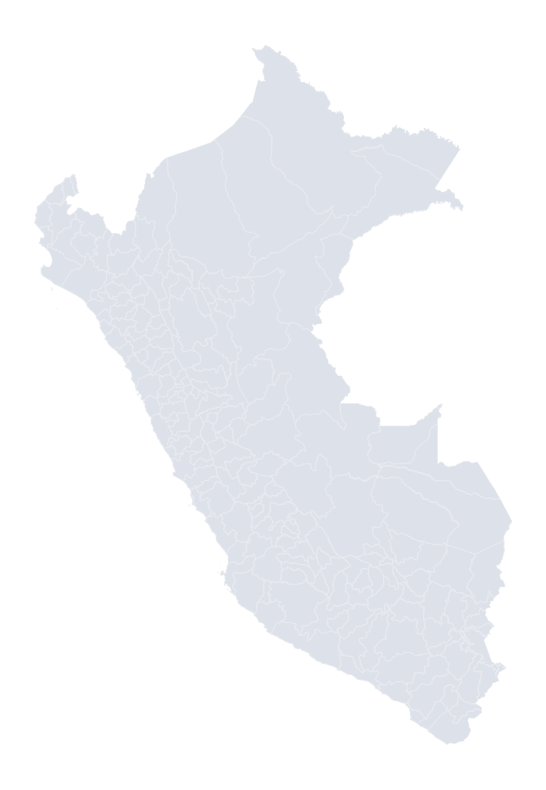

In [54]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the shapefile

gdf = gpd.read_file('PER_adm2.shp')

# Plot the shapefile with customizations
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='#576995', edgecolor='white', alpha=0.2)
ax.axis('off')
# Add title and labels
ax.set_title('')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
M1 = 'M1.png'
plt.savefig(M1, dpi=300, bbox_inches='tight')
# Show the plot
plt.show()


In [40]:
# Ejemplo: resaltar polígonos con IDs específicos
ids_a_resaltar = [1, 2, 3]  # Cambia esto a los IDs de los polígonos que deseas resaltar
poligonos_resaltados = gdf[gdf['ID_1'].isin(ids_a_resaltar)]
poligonos_restantes = gdf[~gdf['ID_1'].isin(ids_a_resaltar)]


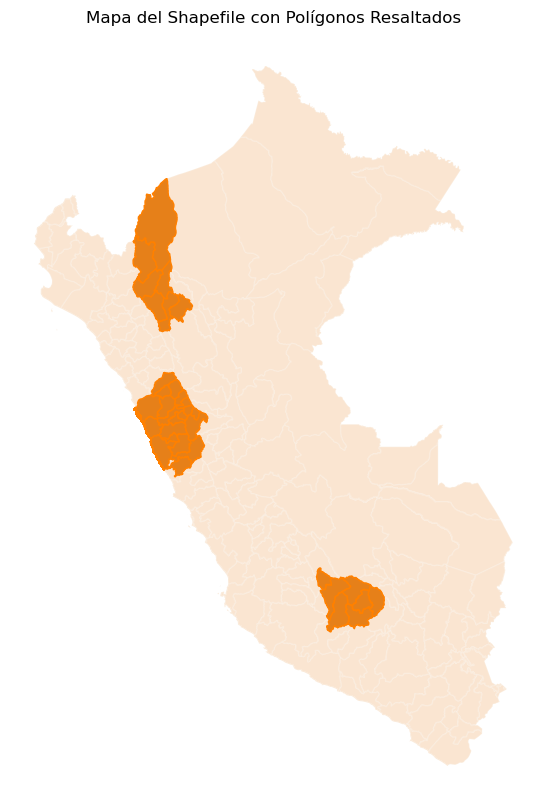

In [50]:
fig, ax = plt.subplots(figsize=(10, 10))

# Grafica los polígonos restantes
poligonos_restantes.plot(ax=ax, color='#e68019', edgecolor='white',
                        alpha=0.2)  # Anaranjado para el relleno y rojo para el borde

# Grafica los polígonos resaltados
poligonos_resaltados.plot(ax=ax, color='#e68019', edgecolor='#ff8000')  # Verde para el relleno y azul para el borde

# Quita los ejes
ax.axis('off')

# Añade título
ax.set_title('Mapa del Shapefile con Polígonos Resaltados')

output_path = 'mapa_resaltado.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
# Muestra el gráfico
plt.show()


In [28]:
gdf.columns

Index(['ID_0', 'ISO', 'NAME_0', 'ID_1', 'NAME_1', 'ID_2', 'NAME_2', 'TYPE_2',
       'ENGTYPE_2', 'NL_NAME_2', 'VARNAME_2', 'geometry'],
      dtype='object')

In [32]:
poligono_id = 1  # Cambia esto al ID del polígono que deseas visualizar
poligono = gdf[gdf['ID_2'] == poligono_id]


In [31]:
gdf

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,178,PER,Peru,1,Amazonas,1,Bagua,Provincia,Province,None,None,"POLYGON ((-78.55276 -4.50258, -78.55524 -4.509..."
1,178,PER,Peru,1,Amazonas,2,Bongará,Provincia,Province,None,Bongart,"POLYGON ((-77.69465 -5.39535, -77.69454 -5.403..."
2,178,PER,Peru,1,Amazonas,3,Chachapoyas,Provincia,Province,None,None,"POLYGON ((-77.7191 -5.94292, -77.71761 -5.9434..."
3,178,PER,Peru,1,Amazonas,4,Condorcanqui,Provincia,Province,None,None,"POLYGON ((-77.78945 -3.11416, -77.78954 -3.119..."
4,178,PER,Peru,1,Amazonas,5,Luya,Provincia,Province,None,None,"POLYGON ((-78.11668 -5.91716, -78.11536 -5.917..."
...,...,...,...,...,...,...,...,...,...,...,...,...
190,178,PER,Peru,25,Tumbes,191,Zarumilla,Provincia,Province,None,None,"MULTIPOLYGON (((-80.27431 -3.42653, -80.27431 ..."
191,178,PER,Peru,26,Ucayali,192,Atalaya,Provincia,Province,None,None,"POLYGON ((-72.71548 -9.41551, -72.71537 -9.416..."
192,178,PER,Peru,26,Ucayali,193,Coronel Portillo,Provincia,Province,None,None,"POLYGON ((-74.48479 -7.29775, -74.47931 -7.298..."
193,178,PER,Peru,26,Ucayali,194,Padre Abad,Provincia,Province,None,None,"POLYGON ((-75.43488 -8.22964, -75.43452 -8.229..."


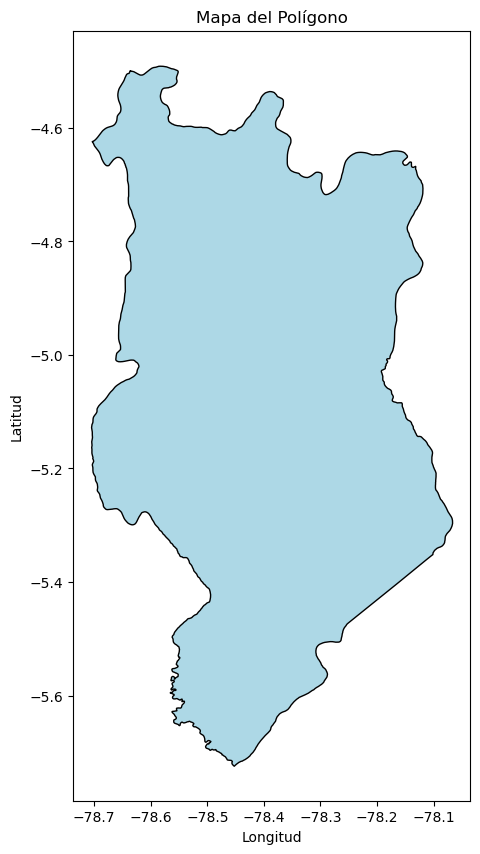

In [33]:
fig, ax = plt.subplots(figsize=(10, 10))
poligono.plot(ax=ax, color='lightblue', edgecolor='black')

# Añade título y etiquetas
ax.set_title('Mapa del Polígono')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Muestra el gráfico
plt.show()


In [56]:
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist, squareform

In [61]:
shapefile_path = 'PER_adm2.shp'
gdf = gpd.read_file(shapefile_path)

# Reproyecta las geometrías a un CRS proyectado (por ejemplo, UTM)
gdf = gdf.to_crs(epsg=32718)  # EPSG:32718 es UTM zona 18S, ajusta según tu ubicación

# Extrae las coordenadas de los centroides de los polígonos
gdf['centroid'] = gdf.geometry.centroid
gdf['longitude'] = gdf.centroid.x
gdf['latitude'] = gdf.centroid.y

# Crea una matriz de características con latitud y longitud
coords = gdf[['longitude', 'latitude']].values

# Calcula la matriz de distancias
dist_matrix = squareform(pdist(coords, metric='euclidean'))



array([[     0.        ,  89544.37159832, 165911.93713563, ...,
        624881.85664525, 525787.41585622, 952893.19636138],
       [ 89544.37159832,      0.        ,  84286.56944203, ...,
        536443.8664127 , 436415.33879939, 864842.9220695 ],
       [165911.93713563,  84286.56944203,      0.        , ...,
        479947.37121532, 366598.21387557, 808281.9889686 ],
       ...,
       [624881.85664525, 536443.8664127 , 479947.37121532, ...,
             0.        , 152348.00416841, 328746.36517594],
       [525787.41585622, 436415.33879939, 366598.21387557, ...,
        152348.00416841,      0.        , 457127.99342596],
       [952893.19636138, 864842.9220695 , 808281.9889686 , ...,
        328746.36517594, 457127.99342596,      0.        ]])

In [65]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(dist_matrix)

# Añade los componentes principales al GeoDataFrame
gdf['PC1'] = principal_components[:, 0]
gdf['PC2'] = principal_components[:, 1]
gdf

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry,centroid,longitude,latitude,PC1,PC2
0,178,PER,Peru,1,Amazonas,1,Bagua,Provincia,Province,None,None,"POLYGON ((105627.648 9501358.319, 105355.8 950...",POINT (122572.625 9437773.751),122572.624506,9.437774e+06,-5.645156e+06,2.624034e+06
1,178,PER,Peru,1,Amazonas,2,Bongará,Provincia,Province,None,Bongart,"POLYGON ((201363.776 9402973.477, 201379.595 9...",POINT (182477.645 9371218.639),182477.644912,9.371219e+06,-5.383787e+06,1.647494e+06
2,178,PER,Peru,1,Amazonas,3,Chachapoyas,Provincia,Province,None,None,"POLYGON ((198936.131 9342365.338, 199101.247 9...",POINT (193116.868 9287606.243),193116.868296,9.287606e+06,-5.172100e+06,7.275116e+05
3,178,PER,Peru,1,Amazonas,4,Condorcanqui,Provincia,Province,None,None,"POLYGON ((189936.576 9655377.85, 189928.726 96...",POINT (163282.591 9537811.512),163282.591167,9.537812e+06,-5.476602e+06,3.576784e+06
4,178,PER,Peru,1,Amazonas,5,Luya,Provincia,Province,None,None,"POLYGON ((154858.884 9344984.168, 155006.181 9...",POINT (157373.626 9301788.268),157373.626264,9.301788e+06,-5.361733e+06,1.022366e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,178,PER,Peru,25,Tumbes,191,Zarumilla,Provincia,Province,None,None,"MULTIPOLYGON (((-86684.927 9619643.642, -86684...",POINT (-84277.751 9593874.366),-84277.751114,9.593874e+06,-5.885829e+06,5.456120e+06
191,178,PER,Peru,26,Ucayali,192,Atalaya,Provincia,Province,None,None,"POLYGON ((750871.287 8958391.234, 750882.227 8...",POINT (694892.474 8850010.558),694892.473559,8.850011e+06,1.273342e+06,-1.465256e+06
192,178,PER,Peru,26,Ucayali,193,Coronel Portillo,Provincia,Province,None,None,"POLYGON ((556869.719 9193303.214, 557474.337 9...",POINT (603621.192 9038938.434),603621.192159,9.038938e+06,-9.240159e+05,-1.075771e+06
193,178,PER,Peru,26,Ucayali,194,Padre Abad,Provincia,Province,None,None,"POLYGON ((452103.831 9090288.403, 452143.335 9...",POINT (451686.131 9027728.99),451686.131239,9.027729e+06,-2.042402e+06,-1.736078e+06


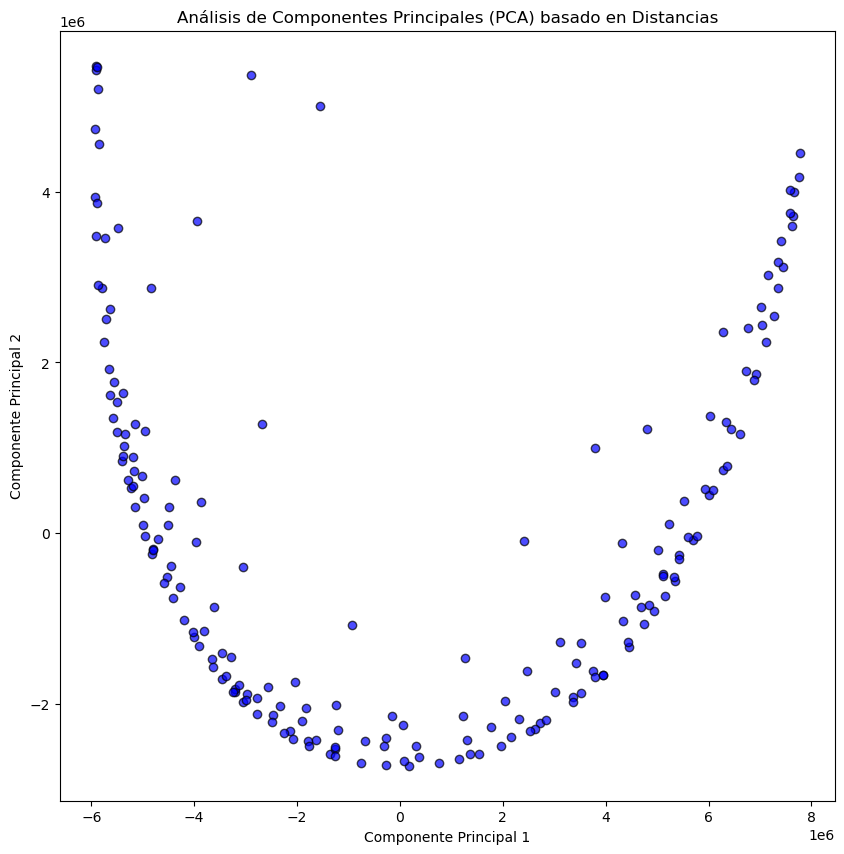

In [63]:
fig, ax = plt.subplots(figsize=(10, 10))

# Grafica los componentes principales
scatter = ax.scatter(gdf['PC1'], gdf['PC2'], c='blue', edgecolor='k', alpha=0.7)

# Añade etiquetas y título
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_title('Análisis de Componentes Principales (PCA) basado en Distancias')

# Muestra el gráfico
plt.show()


In [76]:
!pip install geopandas scikit-learn matplotlib libpysal



In [71]:
#!pip install GWR mgwr.gwr

ERROR: Could not find a version that satisfies the requirement mgwr.gwr (from versions: none)
ERROR: No matching distribution found for mgwr.gwr


In [77]:
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
from libpysal.weights import KNN
from libpysal.weights import lat2W




In [78]:
shapefile_path = 'PER_adm2.shp'
gdf = gpd.read_file(shapefile_path)

# Reproyecta las geometrías a un CRS proyectado (por ejemplo, UTM)
gdf = gdf.to_crs(epsg=32718)  # EPSG:32718 es UTM zona 18S, ajusta según tu ubicación

# Extrae las coordenadas de los centroides de los polígonos
gdf['centroid'] = gdf.geometry.centroid
gdf['longitude'] = gdf.centroid.x
gdf['latitude'] = gdf.centroid.y


In [79]:
gdf

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry,centroid,longitude,latitude
0,178,PER,Peru,1,Amazonas,1,Bagua,Provincia,Province,None,None,"POLYGON ((105627.648 9501358.319, 105355.8 950...",POINT (122572.625 9437773.751),122572.624506,9.437774e+06
1,178,PER,Peru,1,Amazonas,2,Bongará,Provincia,Province,None,Bongart,"POLYGON ((201363.776 9402973.477, 201379.595 9...",POINT (182477.645 9371218.639),182477.644912,9.371219e+06
2,178,PER,Peru,1,Amazonas,3,Chachapoyas,Provincia,Province,None,None,"POLYGON ((198936.131 9342365.338, 199101.247 9...",POINT (193116.868 9287606.243),193116.868296,9.287606e+06
3,178,PER,Peru,1,Amazonas,4,Condorcanqui,Provincia,Province,None,None,"POLYGON ((189936.576 9655377.85, 189928.726 96...",POINT (163282.591 9537811.512),163282.591167,9.537812e+06
4,178,PER,Peru,1,Amazonas,5,Luya,Provincia,Province,None,None,"POLYGON ((154858.884 9344984.168, 155006.181 9...",POINT (157373.626 9301788.268),157373.626264,9.301788e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,178,PER,Peru,25,Tumbes,191,Zarumilla,Provincia,Province,None,None,"MULTIPOLYGON (((-86684.927 9619643.642, -86684...",POINT (-84277.751 9593874.366),-84277.751114,9.593874e+06
191,178,PER,Peru,26,Ucayali,192,Atalaya,Provincia,Province,None,None,"POLYGON ((750871.287 8958391.234, 750882.227 8...",POINT (694892.474 8850010.558),694892.473559,8.850011e+06
192,178,PER,Peru,26,Ucayali,193,Coronel Portillo,Provincia,Province,None,None,"POLYGON ((556869.719 9193303.214, 557474.337 9...",POINT (603621.192 9038938.434),603621.192159,9.038938e+06
193,178,PER,Peru,26,Ucayali,194,Padre Abad,Provincia,Province,None,None,"POLYGON ((452103.831 9090288.403, 452143.335 9...",POINT (451686.131 9027728.99),451686.131239,9.027729e+06
